<a href="https://colab.research.google.com/github/kozoB/MNIST_Auto_Encoder/blob/main/MNISTAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST AutoEncoder

Here I tried to create an AutoEncoder for MNIST dataset's images which learn to represent the images with less data (downsampling the images to lower resoultion) and then recreating the images again with upsampling, trying to get the output images as similar as possible to the input images.
The 'MNIST' is a simple dataset that consists of drawn digits, which should be easy to learn by the autoencoder

# Imports

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as keras
import matplotlib.pyplot as plt
import cv2

# Preproccess Data

 ## Load 'Mnist' Dataset

11490434/11490434 [==============================] - 0s 0us/step


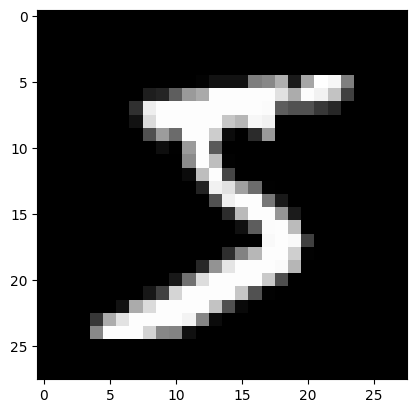

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
plt.imshow(X_train[0], cmap="gray")

## Normalize Iamges to 0-1 Values Range

In [ ]:
X_train = X_train/225.0
X_test = X_test/225.0

# Create AutoEncoder

## Define Encoder

The encoder downsamples 28x28 grayscale images into 8x8 ones

In [ ]:
encoder_input = keras.Input(shape=(28,28,1), name="img") # Encoder input as 28*28 image with 1 channel (grayscale)
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")

## Define Decoder

Tje decoder than upsamples the encoded images back to 28x28 images, trying to reconstruct it to look like the original one

In [ ]:
decoder_input = keras.layers.Dense(784, activation="relu")(encoder_output)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_input)

## Define AutoEncoder Model

In [ ]:
autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")

In [ ]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 101200 (395.31 KB)
Trainable params: 101200 (395.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Define Metaparameters

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.mse
epochs = 3
batch_size = 32
validation_split = 0.1

# Train AutoEncoder

In [ ]:
autoencoder.compile(loss = loss, optimizer=optimizer)

The autoencdoer recieves X_train as the input and as the output/target which the autoencoder tries to reconstruct.

The network adjusts it's weights to minimize the loss (difference) between the input image and the output image

In [ ]:
autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/3
1688/1688 [==============================] - 19s 9ms/step - loss: 0.0220 - val_loss: 0.0145
Epoch 2/3
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0137 - val_loss: 0.0133
Epoch 3/3
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0131 - val_loss: 0.0129


In [ ]:
example = encoder.predict([X_test[0].reshape(-1,28,28,1)])[0]
print(example)

1/1 [==============================] - 0s 78ms/step
[1.5386358  1.3685993  1.3535998  2.294439   0.6293408  0.6069853
 1.4803928  0.54376763 0.62475586 0.5867286  0.         2.4011023
 0.26401842 1.567572   1.0202932  0.34764913 0.5666245  0.7654322
 0.         1.3243657  0.44919276 2.166779   0.44816738 1.535558
 1.2097229  1.6457411  1.4844805  0.38578135 2.6204093  0.91488373
 1.5540466  0.691173   1.6045257  1.8196309  0.         2.2293928
 1.0112469  0.5525394  1.8145478  0.70735085 0.17027146 0.7022657
 1.4211092  0.9840078  0.4361251  1.1031611  1.5948532  2.61781
 0.         2.5563037  0.23851086 0.42463458 0.05031963 0.62339693
 3.2407022  1.5501615  0.5091493  1.4598557  0.27455324 0.22460642
 0.86505955 1.3507963  1.4562691  0.6205733 ]


In [ ]:
example.shape

(64,)

The encoded image's shape

## Encoder Output - Low Resolution Image

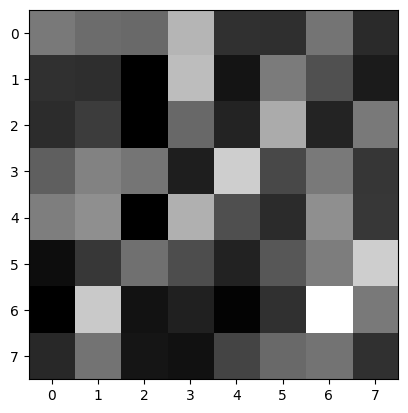

In [ ]:
plt.imshow(example.reshape((8,8)), cmap="gray")

This is the downsampled image which is only 8x8, losing most of it's original data

## Actual Image

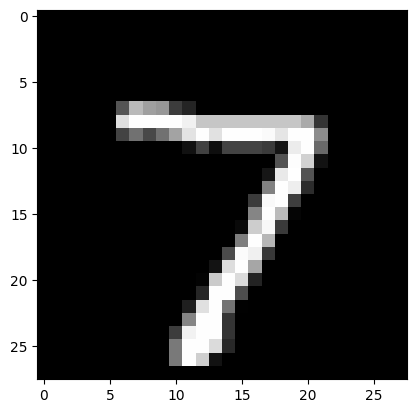

In [ ]:
plt.imshow(X_test[0], cmap="gray")

The original image before downsampling with the encoder

# AutoEncoder Predictions

In [ ]:
autoencoder_output = autoencoder.predict([X_test[0].reshape(-1,28,28,1)])[0]

1/1 [==============================] - 0s 20ms/step


## AutoEncoder Prediciton Result

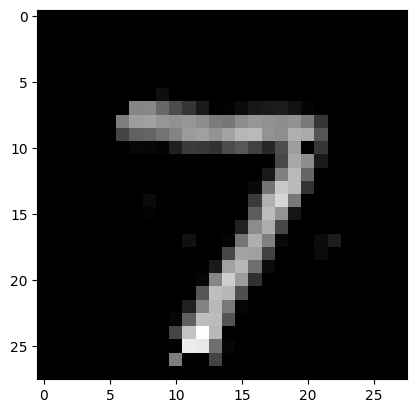

In [ ]:
plt.imshow(autoencoder_output, cmap="gray")

This is the autoencoder result after upsampling the encoded image. As we can see, it looks very similar to the original image, which shows that the autoencoder has managed to learn how to represent the images being only 8x8 and recreate them again pretty accuratly

## Another Example

Lrt's take another image as an example an try to feed it to the autoencoder

In [ ]:
pred_2 = autoencoder.predict([X_test[1].reshape(-1,28,28,1)])[0]

1/1 [==============================] - 0s 20ms/step


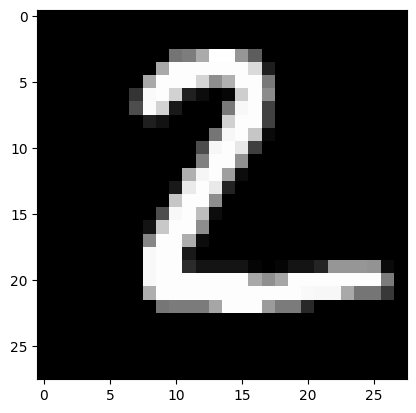

In [ ]:
plt.imshow(X_test[1], cmap="gray")

Original image - the autoencoder's input

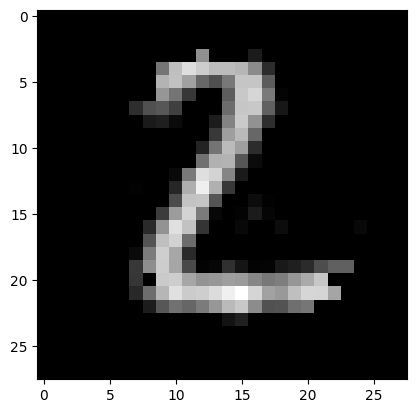

In [ ]:
plt.imshow(pred_2, cmap="gray")

Another example of the autoencoder output and it's similarity to the original input image